## Data Merge

In [86]:
import numpy as np
import pandas as pd

In [6]:
unames = ['userid', 'gender','age','occupation', 'zip']
users = pd.read_csv('../Example Codes/Lec04 Text & Analysis Practice/data/movielens/users.dat', sep="::", header=None, names=unames)
users.head(2)

<ipython-input-6-c8ae1b3d811c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('../Example Codes/Lec04 Text & Analysis Practice/data/movielens/users.dat', sep="::", header=None, names=unames)


,userid,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072


In [12]:
mnames=['movieid','title','genres']
rnames=['userid','movieid','rating','timestamp']

movies= pd.read_csv('../Example Codes/Lec04 Text & Analysis Practice/data/movielens/movies.dat', 
                      sep="::", header=None, names=mnames)
ratings= pd.read_csv('../Example Codes/Lec04 Text & Analysis Practice/data/movielens/ratings.dat', 
                       sep="::", header=None, names=rnames)
movies.head(2)

<ipython-input-12-c2c9ad3574f9>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies= pd.read_csv('../Example Codes/Lec04 Text & Analysis Practice/data/movielens/movies.dat',
<ipython-input-12-c2c9ad3574f9>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings= pd.read_csv('../Example Codes/Lec04 Text & Analysis Practice/data/movielens/ratings.dat',


,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [13]:
ratings.head(2)

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109


In [18]:
pd.merge(ratings,users).iloc[49:60,:]

,userid,movieid,rating,timestamp,gender,age,occupation,zip
49,1,531,4,978302149,F,1,10,48067
50,1,3114,4,978302174,F,1,10,48067
51,1,608,4,978301398,F,1,10,48067
52,1,1246,4,978302091,F,1,10,48067
53,2,1357,5,978298709,M,56,16,70072
54,2,3068,4,978299000,M,56,16,70072
55,2,1537,4,978299620,M,56,16,70072
56,2,647,3,978299351,M,56,16,70072
57,2,2194,4,978299297,M,56,16,70072
58,2,648,4,978299913,M,56,16,70072


In [22]:
pd.merge(pd.merge(ratings,users),movies).head()

,userid,movieid,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


## Json Data

In [69]:
import json

# josn은 파일 오픈 필요
data = json.load(open('../Example Codes/Lec04 Text & Analysis Practice/data/usda_food/database.json'))

In [70]:
len(data), type(data)

(6636, list)

In [71]:
data[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [72]:
# 성분 일정치 않고, 각자 데이터도 다 다름 (구조가 복잡)
data[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [73]:
data[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [74]:
info_keys=['description', 'tags', 'manufacturer', 'group']
info = pd.DataFrame(data, columns=info_keys)
info.head()

,description,tags,manufacturer,group
0,"Cheese, caraway",[],,Dairy and Egg Products
1,"Cheese, cheddar",[],,Dairy and Egg Products
2,"Cheese, edam",[],,Dairy and Egg Products
3,"Cheese, feta",[],,Dairy and Egg Products
4,"Cheese, mozzarella, part skim milk",[],,Dairy and Egg Products


In [75]:
# 컬럼 원소와 이름 붙이기
nutrients=[]

for element in data:#첫번에 데이터 들어오면 그 데이터의 nutrients 값을 갖고오고 
    food = pd.DataFrame(element['nutrients'])
    food['id'] = element['id']#아이디 컬럼을 생성 해, 해당 아이디를 추가
    nutrients.append(food)

nutrients = pd.concat(nutrients, ignore_index=True)
nutrients.head(2)

,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008


In [76]:
# info 테이블과 nutrients 테이블이 id 컬럼으로 연결고리 생김
info_keys=['id','description']
info = pd.DataFrame(data, columns=info_keys)
info.head()

,id,description
0,1008,"Cheese, caraway"
1,1009,"Cheese, cheddar"
2,1018,"Cheese, edam"
3,1019,"Cheese, feta"
4,1028,"Cheese, mozzarella, part skim milk"


In [78]:
nutrients.rename(columns={'description':'nutname'}, inplace=True) #컬럼 description명이 겹치기 때문에 컬럼명 재정의
nutrients = nutrients.drop_duplicates() #중복 요소 삭제
data = pd.merge(info,nutrients) #id로 매칭
data.head(4)

,id,description,value,units,nutname,group
0,1008,"Cheese, caraway",25.18,g,Protein,Composition
1,1008,"Cheese, caraway",29.20,g,Total lipid (fat),Composition
2,1008,"Cheese, caraway",3.06,g,"Carbohydrate, by difference",Composition
3,1008,"Cheese, caraway",3.28,g,Ash,Other


## Us Baby Names

In [94]:
name1880 = pd.read_csv('../Example Codes/Lec04 Text & Analysis Practice/data/babynames/yob1880.txt', names=['name','gender','births'])

years = range(1880, 2011)
names=[]
colums=['name','gender','births']
for year in years:
    path='../Example Codes/Lec04 Text & Analysis Practice/data/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=colums)
    frame['year'] = year
    names.append(frame)
names = pd.concat(names, ignore_index=True)
names.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [97]:
# 성별컬럼으로 묶음
total_births = names.pivot_table('births', index='year',  columns='gender', aggfunc=sum)
total_births.head()

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


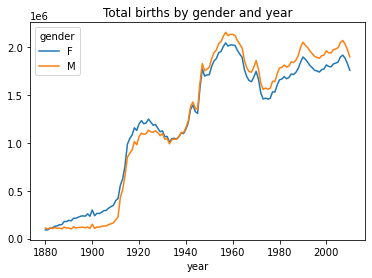

In [98]:
total_births.plot(title='Total births by gender and year');

In [102]:
# 연도별 차지 비율
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group

names = names.groupby(['year','gender']).apply(add_prop)
names.head()

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.460051
1,Anna,F,2604,1880,0.169564
2,Emma,F,2003,1880,0.130429
3,Elizabeth,F,1939,1880,0.126262
4,Minnie,F,1746,1880,0.113694


In [ ]:
# 나머지 내용은 수업 예제파일에서 보기

## 05. TimeSeries Moving Data

In [ ]:
# 데이트는 항상 따로 관리함

In [111]:
#parse_dates를 통해 datetime(날짜형식)으로.. 
df = pd. read_csv('../Example Codes/Lec04 Text & Analysis Practice/data/time/apple_stock.csv', index_col='Date', parse_dates=True)
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

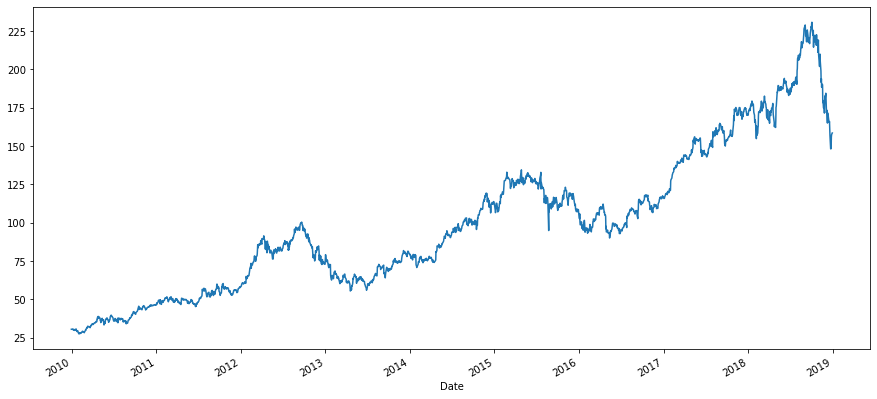

In [115]:
df['Open'].plot(figsize=(15,7))

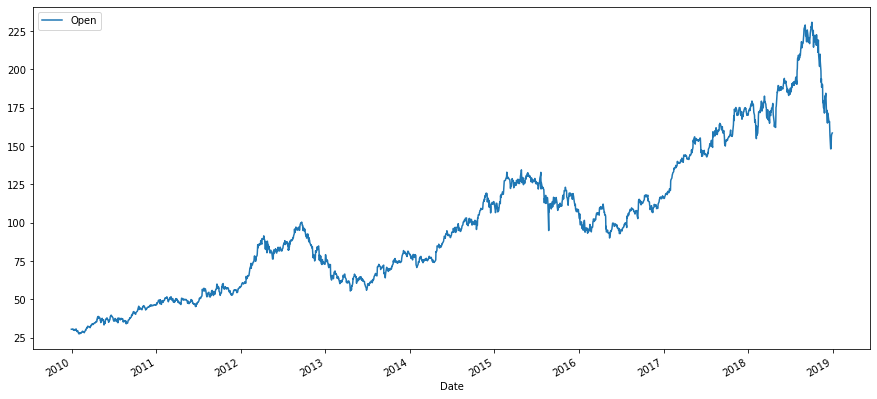

In [116]:
# 리스트로 넣기
df[['Open']].plot(figsize=(15,7))

In [121]:
df['month'] = df.index.month
df.groupby('month').agg('sum')

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [122]:
# 연도별 데이터
df.groupby(df.index.year).sum()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


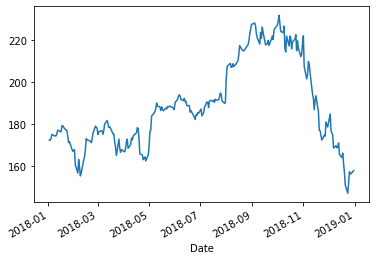

In [123]:
# 데이터 평균 구해서 이동 시키기..?
df['2018':]['Close'].plot()
df['2018':].rolling(window=7).mean()['Close'].plot(figsize=(15,7));

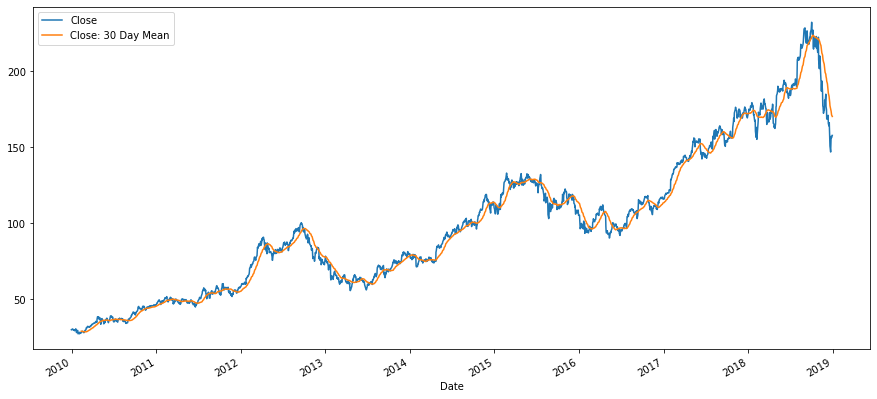

In [124]:
# 실데이터보다 평균적 데이터가 중요한 경우도 있다 (그래프가 올라가는지 내려가는지와 같은 추이..)
df['Close: 30 Day Mean'] = df['Close'].rolling(30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(15,7))